https://github.com/alexsisu/ds1_presentation

Decision trees T&T.

Data Science problem context:
There are some aspects that you need to be aware of when talking about applying a datascience problem in the industry.
1. -understanding of the domain
2. -understanding of the algorithms that you plan to apply
3. -technicalities: libraries, platform
4. -feature engineering:
5. -data transformation pipeline
6. -costs: 
		- time
		- hardware 
		- income/ROI
		- is a slow/high accuracy solution preferable to a fast/medium-low accuracy solution?

1. What is a decision tree.

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
http://scikit-learn.org/stable/modules/tree.html#tree
    
Solve: classification and regression problems.
Classification: the modeled response is discrete domain.
Regression: the response is in continous domain.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2] 0
[ 4.9  3.   1.4  0.2] 0
[ 4.7  3.2  1.3  0.2] 0
[ 4.6  3.1  1.5  0.2] 0
[ 5.   3.6  1.4  0.2] 0
[ 5.4  3.9  1.7  0.4] 0
[ 4.6  3.4  1.4  0.3] 0
[ 5.   3.4  1.5  0.2] 0
[ 4.4  2.9  1.4  0.2] 0
[ 4.9  3.1  1.5  0.1] 0
[ 5.4  3.7  1.5  0.2] 0
[ 4.8  3.4  1.6  0.2] 0
[ 4.8  3.   1.4  0.1] 0
[ 4.3  3.   1.1  0.1] 0
[ 5.8  4.   1.2  0.2] 0
[ 5.7  4.4  1.5  0.4] 0
[ 5.4  3.9  1.3  0.4] 0
[ 5.1  3.5  1.4  0.3] 0
[ 5.7  3.8  1.7  0.3] 0
[ 5.1  3.8  1.5  0.3] 0
[ 5.4  3.4  1.7  0.2] 0
[ 5.1  3.7  1.5  0.4] 0
[ 4.6  3.6  1.   0.2] 0
[ 5.1  3.3  1.7  0.5] 0
[ 4.8  3.4  1.9  0.2] 0
[ 5.   3.   1.6  0.2] 0
[ 5.   3.4  1.6  0.4] 0
[ 5.2  3.5  1.5  0.2] 0
[ 5.2  3.4  1.4  0.2] 0
[ 4.7  3.2  1.6  0.2] 0
[ 4.8  3.1  1.6  0.2] 0
[ 5.4  3.4  1.5  0.4] 0
[ 5.2  4.1  1.5  0.1] 0
[ 5.5  4.2  1.4  0.2] 0
[ 4.9  3.1  1.5  0.1] 0
[ 5.   3.2  1.2  0.2] 0
[ 5.5  3.5  1.3  

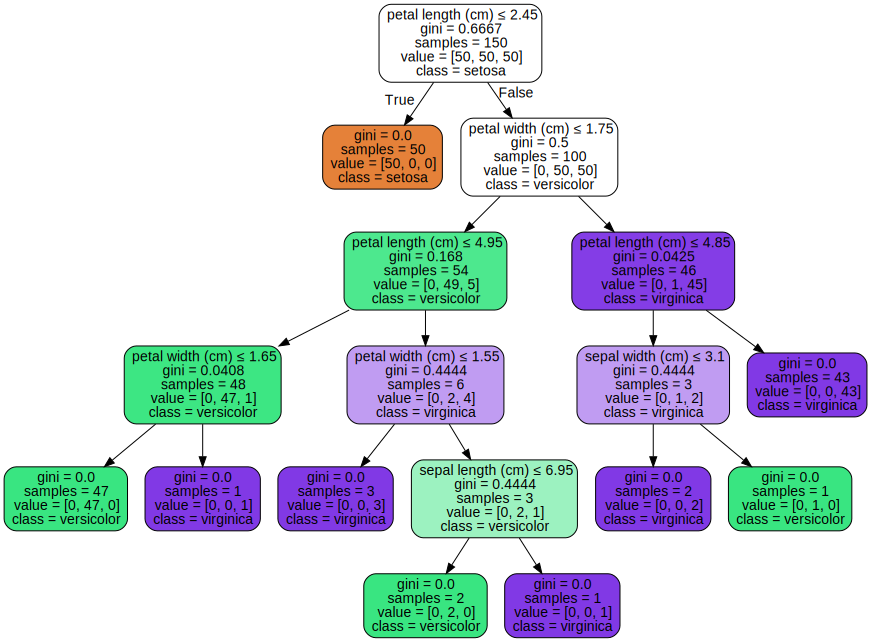

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 

iris = load_iris()

clf = tree.DecisionTreeClassifier()


print(iris.feature_names,iris.target_names)
for i in range(0,len(iris.data)):
    print(iris.data[i],iris.target[i])

clf = clf.fit(iris.data, iris.target)


dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

graph

Decision Tree: Another simple example: titanic+ feature importances

In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]


def harmonize_data(titanic):
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["Age"].median()

    titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
    titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
    titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic


train = pd.read_csv('../datasets/titanic_training.csv', dtype={"Age": np.float64}, )
data = harmonize_data(train)
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X_train, X_test, y_train, y_test = train_test_split(data[predictors],
                                                    data["Survived"],
                                                    test_size=0.33,
                                                    random_state=42)

alg = DecisionTreeClassifier(random_state=1)
alg.fit(X_train, y_train)

predicted = alg.predict(X_test)

print(accuracy_score(y_test, predicted))

for feature_and_importance in zip(predictors, alg.feature_importances_):
    print(feature_and_importance[0], feature_and_importance[1])


0.752542372881
Pclass 0.11497333407
Sex 0.293204696479
Age 0.238330752017
SibSp 0.0619787054849
Parch 0.0136880865557
Fare 0.245392416253
Embarked 0.0324320091414


What are the criterias for choosing nodes in a decision tree.
    - "how does the model know at what value to split the top node"?

    - https://stackoverflow.com/questions/1859554/what-is-entropy-and-information-gain

    -  http://www.inf.ed.ac.uk/teaching/courses/iaml/2011/slides/dt.pdf

    - https://datascience.stackexchange.com/questions/10228/gini-impurity-vs-entropy
    
    The decision tree is built in a top-down fashion, but the question is how do you choose which attribute
    to split at each node? The answer is find the feature that best splits the target class into
    the purest possible children nodes (ie: nodes that don't contain a mix of both male and female,
    rather pure nodes with only one class).

    This measure of purity is called the information. It represents the expected amount of information
    that would be needed to specify whether a new instance (first-name) should be classified male or female,
     given the example that reached the node. We calculate it based on the number of male and female classes at the node.

    Entropy on the other hand is a measure of impurity (the opposite). It is defined for a binary class with values a/b as:

    Entropy = - p(a)*log(p(a)) - p(b)*log(p(b))
    This binary entropy function is depicted in the figure below (random variable can take one of two values). It reaches its maximum when the probability is p=1/2, meaning that p(X=a)=0.5 or similarlyp(X=b)=0.5 having a 50%/50% chance of being either a or b (uncertainty is at a maximum). The entropy function is at zero minimum when probability is p=1 or p=0 with complete certainty (p(X=a)=1 or p(X=a)=0 respectively, latter implies p(X=b)=1).


RandomForest: Another simple example: titanic+ feature importances

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score
import copy

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]


def harmonize_data(titanic):
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["Age"].median()

    titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
    titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
    titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic


original_data = pd.read_csv('../datasets/titanic_training.csv', dtype={"Age": np.float64}, )
data = harmonize_data(original_data)
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X_train, X_test, y_train, y_test = train_test_split(data[predictors], 
                                                    data["Survived"], 
                                                    test_size=0.33, 
                                                    random_state=42)

alg = RandomForestClassifier(
    random_state=1,
    n_estimators=10,
    min_samples_split=4,
    min_samples_leaf=2
)

alg.fit(X_train, y_train)

predicted_y = alg.predict(X_test)
print("RandomForest accuracy: ", accuracy_score(y_test, predicted_y))



RandomForest accuracy:  0.806779661017


Random Forest
- a collection of trees
- Advantages:
    - few tuning parameters
    - dont need to standardize the data
    - build in cross validation
    - low bias
    - big variance
    - prone to overfitting

Parameters:
    - number of trees
    - number of fetaures to consider on each split
    - depth of the trees






Random forest: we have the estimators

In [16]:
model_list = []

for estimator in alg.estimators_:
    individual_prediction = estimator.predict(X_train)
    performing_score = accuracy_score(y_train, individual_prediction)
    model_list.append((estimator, performing_score))

model_list = sorted(model_list, key=lambda p: p[1], reverse=True)

# select the best 5 estimators
selected_models = [p[0] for p in model_list[:5]]
for selected_model in selected_models:
    print(selected_model)

new_rf = copy.copy(alg)
new_rf.estimators_ = selected_models

new_prediction = new_rf.predict(X_test)
print("Selected RandomForest subtrees accuracy: ", accuracy_score(y_test, new_prediction))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1298508491, splitter='best')
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1013994432, splitter='best')
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=550290313, splitter='best')
DecisionTreeClassifier(class_weight=None,

Tip: 
    - Select only the best performing trees
    - Use multiple models and just select the best performing trees
    

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score
import copy

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]


def harmonize_data(titanic):
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["Age"].median()

    titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
    titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
    titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic


original_data = pd.read_csv('../datasets/titanic_training.csv', dtype={"Age": np.float64}, )
data = harmonize_data(original_data)
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X_train, X_test, y_train, y_test = train_test_split(data[predictors], data["Survived"], test_size=0.33, random_state=42)

original_list = []
selected_trees = []
nr_of_models = 30
nr_estimators = 10

for i in range(0, nr_of_models):
    alg = RandomForestClassifier(
        random_state=i,
        n_estimators=nr_estimators,
        min_samples_split=4,
        min_samples_leaf=2
    )

    alg.fit(X_train, y_train)
    original_list.append(alg)

    predicted_y = alg.predict(X_test)
    print("Model", i, "Accuracy score:", accuracy_score(y_test, predicted_y))

    for estimator in alg.estimators_:
        individual_prediction = estimator.predict(X_test)
        performing_score = accuracy_score(y_test, individual_prediction)
        selected_trees.append((estimator, performing_score))

selected_trees = sorted(selected_trees, key=lambda p: p[1], reverse=True)

selected_models = [p[0] for p in selected_trees[:int((nr_of_models * nr_estimators * 2) / 3)]]
# print(selected_models)

new_forest = copy.copy(original_list[0])
new_forest.estimators_ = selected_models

new_prediction = new_forest.predict(X_test)
print("Final model accuracy:",accuracy_score(y_test, new_prediction))



Model 0 Accuracy score: 0.820338983051
Model 1 Accuracy score: 0.806779661017
Model 2 Accuracy score: 0.84406779661
Model 3 Accuracy score: 0.816949152542
Model 4 Accuracy score: 0.8
Model 5 Accuracy score: 0.803389830508
Model 6 Accuracy score: 0.833898305085
Model 7 Accuracy score: 0.796610169492
Model 8 Accuracy score: 0.796610169492
Model 9 Accuracy score: 0.813559322034
Model 10 Accuracy score: 0.806779661017
Model 11 Accuracy score: 0.786440677966
Model 12 Accuracy score: 0.810169491525
Model 13 Accuracy score: 0.8
Model 14 Accuracy score: 0.813559322034
Model 15 Accuracy score: 0.823728813559
Model 16 Accuracy score: 0.820338983051
Model 17 Accuracy score: 0.816949152542
Model 18 Accuracy score: 0.816949152542
Model 19 Accuracy score: 0.786440677966
Model 20 Accuracy score: 0.840677966102
Model 21 Accuracy score: 0.827118644068
Model 22 Accuracy score: 0.8
Model 23 Accuracy score: 0.827118644068
Model 24 Accuracy score: 0.813559322034
Model 25 Accuracy score: 0.827118644068
Mode

RandomForest vs Linear Regression

In [19]:
import os
import sys
import warnings
from math import sqrt

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics.regression import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

if not sys.warnoptions:
    warnings.simplefilter("ignore")

base_dataset_folder = "~/.kaggle/competitions/house-prices-advanced-regression-techniques"
train_file_path = os.path.join(base_dataset_folder, "train.csv")

data = pd.read_csv(train_file_path)

target_column = ["SalePrice"]

predictor_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
                     'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                     'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                     'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                     'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                     'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                     'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
                     'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                     'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                     'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
                     'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
                     'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
                     'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
                     'SaleCondition']


def do_harmonization(original, prColumns, targetColumns):
    dd = original.copy()
    dd.fillna(0)
    for col in prColumns:
        if str(dd[col].dtype).lower() in ["object", "string"]:
            dd[col] = LabelEncoder().fit_transform(dd[col].apply(str))
        dd[col] = dd[col].fillna(dd[col].median())
    dd[targetColumns] = dd[targetColumns]
    return dd


df = do_harmonization(data, predictor_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(df[predictor_columns],
                                                    df[target_column],
                                                    test_size=0.33,
                                                    random_state=42)

print("TRAIN DATASET SIZE:", len(X_train))
print("TEST DATASET SIZE:", len(X_test))
print("AVERAGE PRICE:", df[target_column].mean())

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train[predictor_columns], y_train)

predicted = rf.predict(X_test[predictor_columns])

print("============ALL FEATURES=============")
# print(mean_absolute_error(y_test, predicted))
print("RF Error:", sqrt(mean_squared_error(y_test, predicted)))

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)
print("LR Error:", sqrt(mean_squared_error(y_test, predicted)))



TRAIN DATASET SIZE: 978
TEST DATASET SIZE: 482
AVERAGE PRICE: SalePrice    180921.19589
dtype: float64
============ALL FEATURES=============
RF Error: 31610.376632926025
LR Error: 37471.77220509491


We can make use of feature importance, and retrain the model

In [20]:
feat_imp_df = pd.DataFrame({'id': range(1, len(rf.feature_importances_) + 1)})
feat_imp_df['feature'] = predictor_columns
feat_imp_df['importance'] = rf.feature_importances_

columns_with_features = list(zip(predictor_columns, rf.feature_importances_))
columns_with_features.sort(key=lambda x: x[1], reverse=True)
print(feat_imp_df.head(20))

nr_of_features = len(columns_with_features)

print("============SELECTED FEATURES=============")
selected_features = [p[0] for p in columns_with_features[0:int(nr_of_features / 1.5)]]

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train[selected_features], y_train)

predicted = rf.predict(X_test[selected_features])

# print(mean_absolute_error(y_test, predicted))
print("RF Error:", sqrt(mean_squared_error(y_test, predicted)))

lr = LinearRegression()
lr.fit(X_train[selected_features], y_train)

predicted = lr.predict(X_test[selected_features])

# print(mean_absolute_error(y_test, predicted))
print("LR Error:", sqrt(mean_squared_error(y_test, predicted)))


    id       feature  importance
0    1    MSSubClass    0.001954
1    2      MSZoning    0.000534
2    3   LotFrontage    0.005174
3    4       LotArea    0.018370
4    5        Street    0.000015
5    6         Alley    0.002003
6    7      LotShape    0.001449
7    8   LandContour    0.003677
8    9     Utilities    0.000000
9   10     LotConfig    0.000830
10  11     LandSlope    0.000246
11  12  Neighborhood    0.008447
12  13    Condition1    0.000321
13  14    Condition2    0.000009
14  15      BldgType    0.000151
15  16    HouseStyle    0.003172
16  17   OverallQual    0.504800
17  18   OverallCond    0.003665
18  19     YearBuilt    0.019896
19  20  YearRemodAdd    0.009683
============SELECTED FEATURES=============
RF Error: 32931.82233785607
LR Error: 35668.70917289232


===============================OKA============================


In [21]:
import os
import sys
import warnings
from math import sqrt

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics.regression import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

if not sys.warnoptions:
    warnings.simplefilter("ignore")


base_dataset_folder = "~/.kaggle/competitions/house-prices-advanced-regression-techniques"
train_file_path = os.path.join(base_dataset_folder, "train.csv")

data = pd.read_csv(train_file_path)
target_column = ["SalePrice"]
predictor_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
                     'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                     'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                     'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                     'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                     'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                     'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
                     'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                     'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                     'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
                     'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
                     'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
                     'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
                     'SaleCondition']


def do_harmonization(original, prColumns, targetColumns):
    dd = original.copy()
    dd.fillna(0)
    for col in prColumns:
        if str(dd[col].dtype).lower() in ["object", "string"]:
            dd[col] = LabelEncoder().fit_transform(dd[col].apply(str))
        dd[col] = dd[col].fillna(dd[col].median())
    dd[target_column] = dd[targetColumns]
    return dd


df = do_harmonization(data, predictor_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(df[predictor_columns], df[target_column], test_size=0.33,
                                                    random_state=42)

print("TRAIN DATASET SIZE:", len(X_train))
print("TEST DATASET SIZE:", len(X_test))
print("AVERAGE PRICE:", df[target_column].mean())

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)
print("LR Error:", sqrt(mean_squared_error(y_test, predicted)))

nr_of_models = 10
collected_scores = np.zeros((1, len(y_test)))
for i in range(0, nr_of_models):
    rf = RandomForestRegressor(random_state=i + 1)
    rf.fit(X_train[predictor_columns], y_train)
    predicted = rf.predict(X_test[predictor_columns])
    collected_scores = collected_scores + predicted

collected_scores = collected_scores / (float(nr_of_models))

print("============ALL FEATURES=============")
print("RF Error:", sqrt(mean_squared_error(y_test, collected_scores[0])))



TRAIN DATASET SIZE: 978
TEST DATASET SIZE: 482
AVERAGE PRICE: SalePrice    180921.19589
dtype: float64
LR Error: 37471.77220509491
============ALL FEATURES=============
RF Error: 31154.61861789053


Optimization using:
- feature selection
- multiple models
- sub trees selection
- compare


In [22]:
import os
import sys
import warnings
from math import sqrt

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics.regression import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
import numpy as np

if not sys.warnoptions:
    warnings.simplefilter("ignore")


base_dataset_folder = "~/.kaggle/competitions/house-prices-advanced-regression-techniques"
train_file_path = os.path.join(base_dataset_folder, "train.csv")

data = pd.read_csv(train_file_path)
nr_of_models = 10
target_column = ["SalePrice"]


predictor_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
                     'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                     'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                     'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                     'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                     'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                     'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
                     'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                     'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                     'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
                     'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
                     'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
                     'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
                     'SaleCondition']


def do_harmonization(original, prColumns, targetColumns):
    dd = original.copy()
    dd.fillna(0)
    for col in prColumns:
#        print("Processing", col)
        if str(dd[col].dtype).lower() in ["object", "string"]:
            dd[col] = LabelEncoder().fit_transform(dd[col].apply(str))
        dd[col] = dd[col].fillna(dd[col].median())
#        dd[col] = StandardScaler().fit_transform(dd[col].fillna(dd[col].median()))
#        dd[col] = Normalizer().fit_transform(dd[col].fillna(dd[col].median()).reshape(1, -1))[0]
        
    dd[targetColumns] = dd[targetColumns] 
#    dd[targetColumns] =np.log(dd[targetColumns])
    return dd


df = do_harmonization(data, predictor_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(df[predictor_columns], df[target_column], test_size=0.33,
                                                    random_state=42)

print("TRAIN DATASET SIZE:", len(X_train))
print("TEST DATASET SIZE:", len(X_test))
print("AVERAGE PRICE:", df[target_column].mean())

print("============ALL FEATURES=============")

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)
print("LR Error:", sqrt(mean_squared_error(y_test, predicted)))

collected_scores = np.zeros((1, len(y_test)))
for i in range(0, nr_of_models):
    rf = RandomForestRegressor(random_state=i + 1)
    rf.fit(X_train[predictor_columns], y_train)
    predicted = rf.predict(X_test[predictor_columns])
    collected_scores = collected_scores + predicted

collected_scores = collected_scores / (float(nr_of_models))

# print(mean_absolute_error(y_test, predicted))
print("RF OKA Error:", sqrt(mean_squared_error(y_test, collected_scores[0])))



print("============BEGIN PERFORMING FEATURE SELECTION=============")
columns_with_features = list(zip(predictor_columns, rf.feature_importances_))
columns_with_features.sort(key=lambda x: x[1], reverse=True)
print("============END PERFORMING FEATURE SELECTION=============")
nr_of_features = len(columns_with_features)

selected_features = [p[0] for p in columns_with_features[0:int(nr_of_features / 1.5)]]
print(selected_features[:10])
print("============MODELS USING SELECTED FEATURES=============")

lr = LinearRegression()
lr.fit(X_train[selected_features], y_train)

predicted = lr.predict(X_test[selected_features])

# print(mean_absolute_error(y_test, predicted))
print("ONE LR Selected Features Error:", sqrt(mean_squared_error(y_test, predicted)))

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train[selected_features], y_train)

predicted = rf.predict(X_test[selected_features])

# print(mean_absolute_error(y_test, predicted))
print("ONE RF Selected Feature  Error:", sqrt(mean_squared_error(y_test, predicted)))

print("============SELECTED FEATURES OKA LR an RF =============")

collected_scores = np.zeros((1, len(y_test)))
for i in range(0, nr_of_models):
    lr = LinearRegression()
    lr.fit(X_train[selected_features], y_train)
    predicted = lr.predict(X_test[selected_features])
    collected_scores = collected_scores + predicted

collected_scores = collected_scores / (float(nr_of_models))
print("LR OKA Error:", sqrt(mean_squared_error(y_test, predicted)))

collected_scores = np.zeros((1, len(y_test)))
for i in range(0, nr_of_models):
    rf = RandomForestRegressor(random_state=i + 1)
    rf.fit(X_train[selected_features], y_train)
    predicted = rf.predict(X_test[selected_features])
    collected_scores = collected_scores + predicted

collected_scores = collected_scores / (float(nr_of_models))

# print(mean_absolute_error(y_test, predicted))
print("RF OKA Error:",
      sqrt(mean_squared_error(y_test, collected_scores[0])))  # collected_scores[0] because is a list of lists

print("============SELECTED FEATURES OKA RF with sub trees selection =============")

lr = LinearRegression()
lr.fit(X_train[selected_features], y_train)

predicted = lr.predict(X_test[selected_features])

# print(mean_absolute_error(y_test, predicted))
print("LR Selected Features Error:", sqrt(mean_squared_error(y_test, predicted)))

selected_trees = []

collected_scores = np.zeros((1, len(y_test)))
for i in range(0, nr_of_models):
    rf = RandomForestRegressor(random_state=i + 1)
    rf.fit(X_train[selected_features], y_train)
    predicted = rf.predict(X_test[selected_features])
    for estimator in rf.estimators_:
        individual_prediction = estimator.predict(X_train[selected_features])
        performing_score = sqrt(mean_squared_error(y_train, individual_prediction))
        selected_trees.append((estimator, performing_score))

selected_trees = sorted(selected_trees, key=lambda p: p[1], reverse=False)

selected_trees2 = selected_trees[0:int(len(selected_trees) * 0.5)]

print("Selected a nr of: ", len(selected_trees2), " out of ", len(selected_trees))

collected_scores = np.zeros((1, len(y_test)))
for tuple_est in selected_trees2:
    estimator = tuple_est[0]
    predicted = estimator.predict(X_test[selected_features])
    collected_scores = collected_scores + predicted

collected_scores = collected_scores / (float(len(selected_trees2)))

print("RF OKA with subtree selection Error:", sqrt(mean_squared_error(y_test, collected_scores[0])))



TRAIN DATASET SIZE: 978
TEST DATASET SIZE: 482
AVERAGE PRICE: SalePrice    180921.19589
dtype: float64
============ALL FEATURES=============
LR Error: 37471.77220509491
RF OKA Error: 31154.61861789053
============BEGIN PERFORMING FEATURE SELECTION=============
============END PERFORMING FEATURE SELECTION=============
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'BsmtFinSF1', 'GarageCars', 'BsmtQual', 'LotArea', 'YearRemodAdd']
============MODELS USING SELECTED FEATURES=============
ONE LR Selected Features Error: 35983.01118207054
ONE RF Selected Feature  Error: 31766.848021809576
============SELECTED FEATURES OKA LR an RF =============
LR OKA Error: 35983.01118207054
RF OKA Error: 30901.482297572562
============SELECTED FEATURES OKA RF with sub trees selection =============
LR Selected Features Error: 35983.01118207054
Selected a nr of:  50  out of  100
RF OKA with subtree selection Error: 30815.860138074237


Tip:
    - Ensemble modeling:
        - feed the results from the previous model
        - train another model with them
        - use another model that takes training data as input from your 

In [23]:
collective_df = pd.DataFrame({'param': range(1, len(X_train) + 1)})
counter = 0
fcols = []
for tuple_est in selected_trees2:
    counter += 1
    estimator = tuple_est[0]
    predicted = estimator.predict(X_train[selected_features])
    collective_df["col" + str(counter)] = predicted
    fcols.append("col" + str(counter))

shmenModel = Ridge()
shmenModel.fit(collective_df[fcols], y_train)

to_predict_df = pd.DataFrame({'id': range(1, len(X_test) + 1)})
counter = 0
fcols = []
for tuple_est in selected_trees2:
    counter += 1
    estimator = tuple_est[0]
    predicted = estimator.predict(X_test[selected_features])
    to_predict_df["col" + str(counter)] = predicted
    fcols.append("col" + str(counter))

predicted = shmenModel.predict(to_predict_df[fcols])

print("Shmen Error:", sqrt(mean_squared_error(y_test, predicted)))


Shmen Error: 28855.134557692432
